In [1]:
cd ..

/data/vision/beery/scratch/evelyn/task_datacomp


In [2]:
import pandas as pd
import numpy as np

In [3]:
from visualizations.utils import plot_train_and_subsets, plot_test_and_subsets, UIDSelectorComparator

In [4]:
fraction = 0.5

In [12]:
subset_paths = [
    f"/data/vision/beery/scratch/evelyn/task_datacomp/experiments/iWildCam/gradmatch_acf_fraction_{fraction}_selection_batch_16_selection_lr_0.01/test1_subset.npy",
    f"/data/vision/beery/scratch/evelyn/task_datacomp/experiments/iWildCam/match_dist_fraction_{fraction}/test1_subset.npy",
    # "/data/vision/beery/scratch/evelyn/task_datacomp/experiments/iWildCam/no_filter_fraction_1/test1_subset.npy",
    # "/data/vision/beery/scratch/evelyn/task_datacomp/experiments/iWildCam/random_filter_fraction_0.25/test1_subset.npy",

]

In [4]:
from baselines.utils import get_dataset

In [5]:
get_dataset('iWildCam', 'train').mapping

/data/vision/beery/scratch/neha/task-datacomp/all_datasets/iWildCam/new_splits/train.csv


{0.0: 'mazama temama',
 1.0: 'empty',
 2.0: 'papio anubis',
 3.0: 'syncerus caffer',
 4.0: 'aepyceros melampus',
 5.0: 'cephalophus nigrifrons',
 6.0: 'helarctos malayanus',
 7.0: 'didelphis sp',
 8.0: 'urocyon cinereoargenteus',
 9.0: 'meleagris ocellata',
 10.0: 'motorcycle',
 11.0: 'cricetomys gambianus',
 12.0: 'dasyprocta punctata',
 13.0: 'loxodonta africana',
 14.0: 'madoqua guentheri',
 15.0: 'agouti paca',
 16.0: 'cuniculus paca',
 17.0: 'funisciurus carruthersi',
 18.0: 'pardofelis temminckii',
 19.0: 'muntiacus muntjak',
 20.0: 'tayassu pecari',
 21.0: 'bos taurus',
 22.0: 'macaca sp',
 23.0: 'prionodon linsang',
 24.0: 'equus quagga',
 25.0: 'leopardus pardalis',
 26.0: 'eira barbara',
 27.0: 'crax rubra',
 28.0: 'atherurus africanus',
 29.0: 'equus grevyi',
 30.0: 'capricornis sumatraensis',
 31.0: 'turtur tympanistria',
 32.0: 'lycaon pictus',
 33.0: 'panthera onca',
 34.0: 'arborophila rubrirostris',
 35.0: 'argusianus argus',
 36.0: 'francolinus nobilis',
 37.0: 'cercop

In [11]:
train_df = pd.read_csv("/data/vision/beery/scratch/neha/task-datacomp/all_datasets/iWildCam/redone_splits/train.csv")

In [16]:
uid_to_label = dict(zip(train_df["uid"], train_df["label"]))
np.save("visualizations/uid_to_label.npy", uid_to_label)

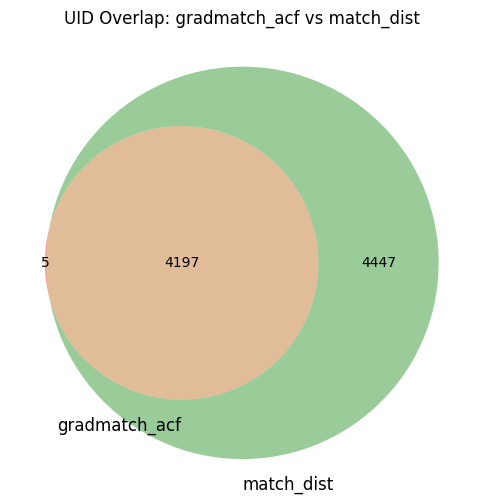

=== Summary: gradmatch_acf vs match_dist ===
gradmatch_acf count: 4202
match_dist count: 8644
Intersection: 4197
Only gradmatch_acf: 5
Only match_dist: 4447
Union: 8649
IOU: 0.4853
Overlap (intersection / min(n1,n2)): 0.9988


In [22]:
comparator = UIDSelectorComparator(
    uid_files={
        "gradmatch": f"experiments/iWildCam/gradmatch_fraction_{fraction}_selection_batch_16_selection_lr_0.01/test1_subset.npy",
        "gradmatch_acf": f"experiments/iWildCam/gradmatch_acf_fraction_{fraction}_selection_batch_16_selection_lr_0.01/test1_subset.npy",
        "match_dist": f"experiments/iWildCam/match_dist_fraction_{fraction}/test1_subset.npy",
    },
    label_map_file = "visualizations/uid_to_label.npy"
)

# Overall metrics
# print("IOU:", comparator.iou("gradmatch", "gradmatch_acf"))
# print("Counts:", comparator.overlap_counts("gradmatch", "gradmatch_acf"))

# Overlap visualization
comparator.venn("gradmatch_acf", "match_dist")

# # Per-label IOU analysis
# comparator.barplot_per_label_iou("gradmatch", "gradmatch_acf")

comparator.summary_stats("gradmatch_acf", "match_dist")

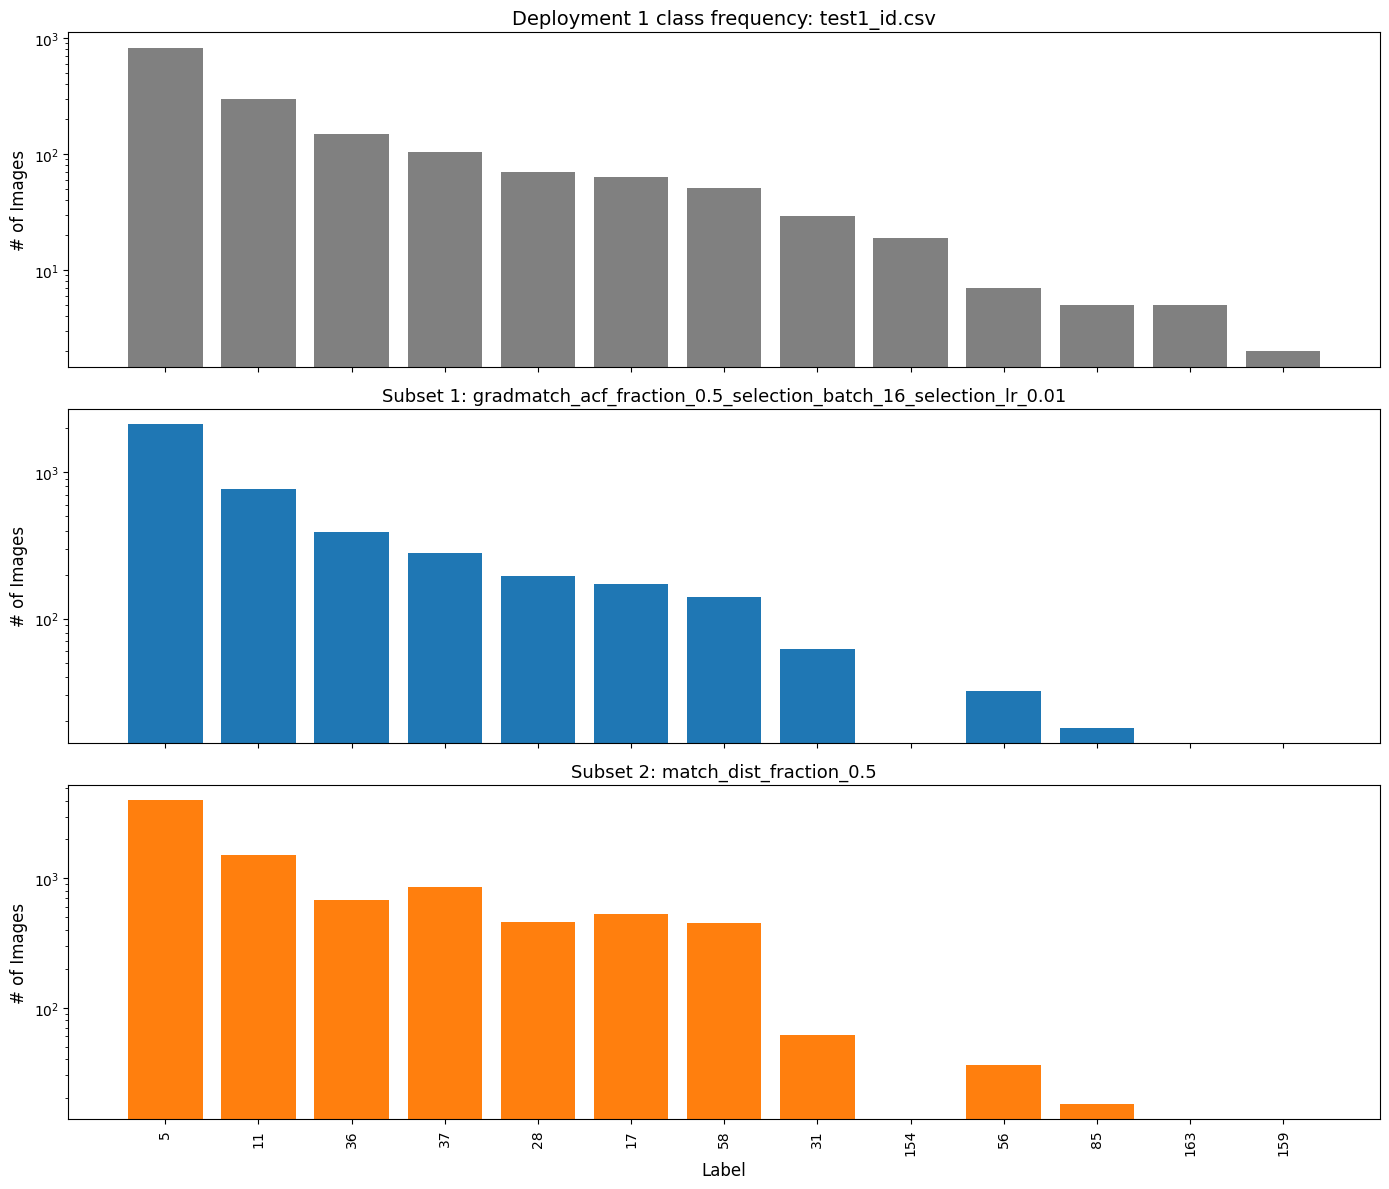

In [13]:
plot_test_and_subsets(
    test_csv_path="/data/vision/beery/scratch/neha/task-datacomp/all_datasets/iWildCam/redone_splits/test1_id.csv",
    train_csv_path="/data/vision/beery/scratch/neha/task-datacomp/all_datasets/iWildCam/redone_splits/train.csv",
    subset_paths=subset_paths
)

In [4]:
train_csv_path="/data/vision/beery/scratch/neha/task-datacomp/all_datasets/iWildCam/new_splits/train.csv"
pd.read_csv(train_csv_path)['label'].unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148.])

In [8]:
val_csv_path = "/data/vision/beery/scratch/neha/task-datacomp/all_datasets/iWildCam/new_splits/val1_id.csv"
test_csv_path = "/data/vision/beery/scratch/neha/task-datacomp/all_datasets/iWildCam/new_splits/test1_id.csv"

In [9]:
sorted(pd.read_csv(val_csv_path)['label'].unique())

[5, 11, 17, 28, 36, 37]

In [10]:
sorted(pd.read_csv(test_csv_path)['label'].unique())

[5, 11, 17, 28, 31, 36, 37, 56, 58, 85, 154, 159, 163]

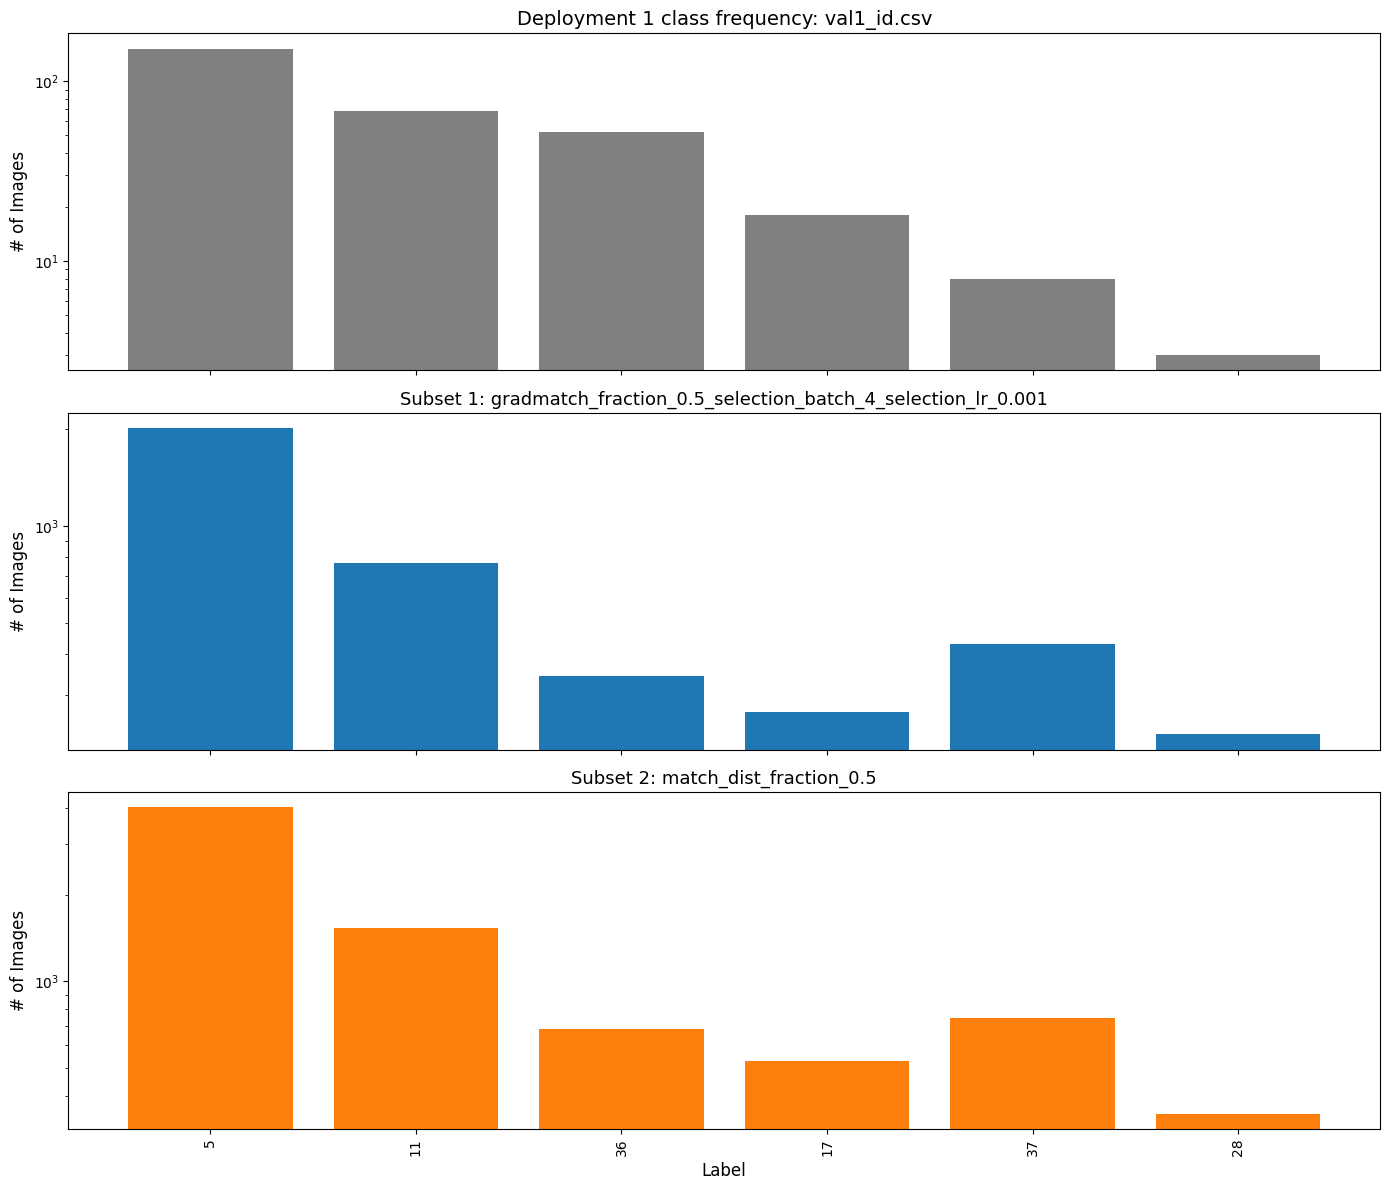

In [35]:
subset_paths = [
    "/data/vision/beery/scratch/evelyn/task_datacomp/experiments/iWildCam/gradmatch_fraction_0.5_selection_batch_4_selection_lr_0.001/test1_subset.npy",
    "/data/vision/beery/scratch/evelyn/task_datacomp/experiments/iWildCam/match_dist_fraction_0.5/test1_subset.npy",
    # "/data/vision/beery/scratch/evelyn/task_datacomp/experiments/iWildCam/no_filter_fraction_1/test1_subset.npy",
    # "/data/vision/beery/scratch/evelyn/task_datacomp/experiments/iWildCam/random_filter_fraction_0.25/test1_subset.npy",

]

plot_test_and_subsets(
    test_csv_path="/data/vision/beery/scratch/neha/task-datacomp/all_datasets/iWildCam/new_splits/val1_id.csv",
    train_csv_path="/data/vision/beery/scratch/neha/task-datacomp/all_datasets/iWildCam/new_splits/train.csv",
    subset_paths=subset_paths
)

In [9]:
cd ..

/data/vision/beery/scratch/evelyn/task_datacomp


In [10]:
pwd

'/data/vision/beery/scratch/evelyn/task_datacomp'

In [11]:
from baselines.utils import get_dataset

In [12]:
train_dataset = get_dataset(dataset_name="iWildCam",split="train")
train_labels = train_dataset.labels

/data/vision/beery/scratch/neha/task-datacomp/all_datasets/iWildCam/new_splits/train.csv


In [13]:
train_labels

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
129732    1.0
129733    1.0
129734    1.0
129735    1.0
129736    1.0
Name: label, Length: 129737, dtype: float64

In [44]:
len(pd.read_csv(train_csv_path))

129737

In [18]:
metrics_json = "/data/vision/beery/scratch/evelyn/task_datacomp/experiments/iWildCam/gradmatch_fraction_0.5_selection_batch_4_selection_lr_0.001/test1_full_finetune_resnet50_lr=0.001_batchsize=128_metrics.json"



In [19]:
import json

with open(metrics_json, 'r') as f:
    data = json.load(f)

data

{'acc': 0.8269592476489028,
 'accuracy': 0.8269592476489028,
 'subset_size': 3638}

In [43]:
metrics_json = "/data/vision/beery/scratch/evelyn/task_datacomp/experiments/iWildCam/match_dist_fraction_0.5/test1_full_finetune_resnet50_lr=0.001_batchsize=128_metrics.json"

import json

with open(metrics_json, 'r') as f:
    data = json.load(f)

data

{'acc': 0.8394984326018808,
 'accuracy': 0.8394984326018808,
 'subset_size': 7075}

In [26]:
train_dataset = get_dataset(dataset_name="iWildCam",split="train")
val_dataset = get_dataset(dataset_name="iWildCam",split=f"val1")
train_labels = train_dataset.labels
val_labels = val_dataset.labels
train_uids = train_dataset.uids
unique_train_labels = set(train_labels.unique())
unique_test_labels = set(val_labels.unique())
common_labels = unique_train_labels & unique_test_labels
common_indices = train_labels[train_labels.isin(common_labels)].index

/data/vision/beery/scratch/neha/task-datacomp/all_datasets/iWildCam/new_splits/train.csv
/data/vision/beery/scratch/neha/task-datacomp/all_datasets/iWildCam/new_splits/val1_id.csv


In [28]:
len(common_indices)

8090

In [21]:

val_labels = pd.read_csv(val_csv_path)['label'].unique()

NameError: name 'pd' is not defined

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy  # for KL divergence

def compute_label_distributions(test_csv_path, train_csv_path, subset_paths, uid_col="UID", label_col="label", top_n=50):
    """
    Computes normalized label distributions for test and subset .npy files.
    """
    # Normalize subset_paths
    if isinstance(subset_paths, str):
        subset_paths = [subset_paths]

    # Load test and train data
    test_df = pd.read_csv(test_csv_path)
    train_df = pd.read_csv(train_csv_path)

    # --- Compute test distribution ---
    test_label_counts = test_df[label_col].value_counts()
    top_labels = test_label_counts.index[:top_n]
    test_probs = np.array([test_label_counts.get(lbl, 0) for lbl in top_labels], dtype=float)
    test_probs /= test_probs.sum()

    # --- Compute each subset distribution (mapped via train.csv) ---
    subset_distributions = {}
    for path in subset_paths:
        subset_uids = np.load(path, allow_pickle=True)
        subset_df = train_df[train_df[uid_col].isin(subset_uids)]
        subset_label_counts = subset_df[label_col].value_counts()
        subset_probs = np.array([subset_label_counts.get(lbl, 0) for lbl in top_labels], dtype=float)
        subset_probs /= subset_probs.sum() if subset_probs.sum() > 0 else 1
        subset_name = os.path.basename(os.path.dirname(path))
        subset_distributions[subset_name] = subset_probs

    return top_labels, test_probs, subset_distributions


def compute_kl_divergences(test_csv_path, train_csv_path, subset_paths, uid_col="uid", label_col="category_id", top_n=50):
    """
    Computes the KL divergence between the test set and each subset distribution.
    Returns a dict mapping subset_name -> KL divergence value.
    """
    top_labels, test_probs, subset_distributions = compute_label_distributions(
        test_csv_path, train_csv_path, subset_paths, uid_col, label_col, top_n
    )

    kl_results = {}
    for subset_name, subset_probs in subset_distributions.items():
        # KL divergence (add small epsilon for numerical stability)
        eps = 1e-10
        kl = entropy(test_probs + eps, subset_probs + eps)
        kl_results[subset_name] = kl

    return kl_results


In [12]:
subset_paths = [
    "/data/vision/beery/scratch/evelyn/task_datacomp/experiments/iWildCam/gradmatch_fraction_0.25_selection_batch_4_selection_lr_0.01/test1_subset.npy",
    "/data/vision/beery/scratch/evelyn/task_datacomp/experiments/iWildCam/match_dist_fraction_0.25/test1_subset.npy",
    # "/data/vision/beery/scratch/evelyn/task_datacomp/experiments/iWildCam/no_filter_fraction_1/test1_subset.npy",
    # "/data/vision/beery/scratch/evelyn/task_datacomp/experiments/iWildCam/random_filter_fraction_0.25/test1_subset.npy",
]

kl_results = compute_kl_divergences(
    test_csv_path="/data/vision/beery/scratch/neha/task-datacomp/all_datasets/iWildCam/new_splits/test1_id.csv",
    train_csv_path="/data/vision/beery/scratch/neha/task-datacomp/all_datasets/iWildCam/new_splits/train.csv",
    subset_paths=subset_paths
)

for name, kl in kl_results.items():
    print(f"{name}: KL divergence = {kl:.4f}")

gradmatch_fraction_0.25_selection_batch_4_selection_lr_0.01: KL divergence = 1.5731
match_dist_fraction_0.25: KL divergence = 1.5287


In [17]:
subset_paths = [
    "/data/vision/beery/scratch/evelyn/task_datacomp/experiments/iWildCam/gradmatch_fraction_0.5_selection_batch_4_selection_lr_0.001/test1_subset.npy",
    "/data/vision/beery/scratch/evelyn/task_datacomp/experiments/iWildCam/match_dist_fraction_0.5/test1_subset.npy",
    # "/data/vision/beery/scratch/evelyn/task_datacomp/experiments/iWildCam/no_filter_fraction_1/test1_subset.npy",
    # "/data/vision/beery/scratch/evelyn/task_datacomp/experiments/iWildCam/random_filter_fraction_0.25/test1_subset.npy",
]

kl_results = compute_kl_divergences(
    test_csv_path="/data/vision/beery/scratch/neha/task-datacomp/all_datasets/iWildCam/new_splits/test1_id.csv",
    train_csv_path="/data/vision/beery/scratch/neha/task-datacomp/all_datasets/iWildCam/new_splits/train.csv",
    subset_paths=subset_paths
)

for name, kl in kl_results.items():
    print(f"{name}: KL divergence = {kl:.4f}")

gradmatch_fraction_0.5_selection_batch_4_selection_lr_0.001: KL divergence = 1.5288
match_dist_fraction_0.5: KL divergence = 1.5261
